<a href="https://colab.research.google.com/github/NGUYEN-CONG-VINH/BAI_TAP_TUAN_6_AI/blob/main/NHIET_DO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7ccd9abd2f1067650244612b9b771972988eaa03afe251b2aa4b9d72d93847ea
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [9]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

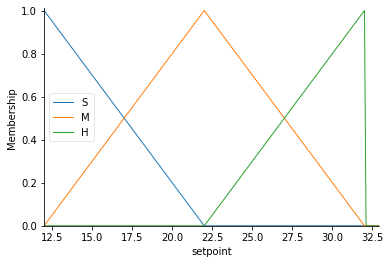

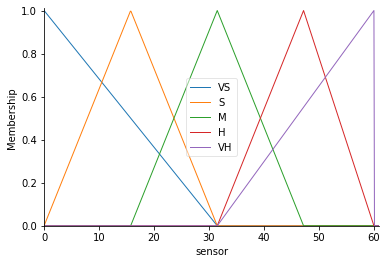

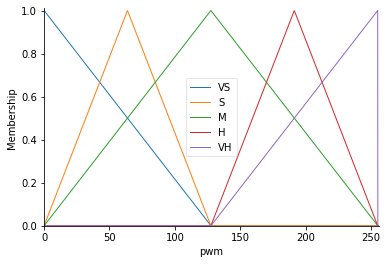

In [28]:
from skfuzzy.control.fuzzyvariable import trimf
setpoint = ctrl.Antecedent(np.arange(12,33,0.1), 'setpoint')
sensor = ctrl.Antecedent(np.arange(0,61,0.1), 'sensor')
pwm = ctrl.Consequent(np.arange(0,256,0.1), 'pwm')
setpoint['S']=fuzz.trimf(setpoint.universe, [12 ,12, 22])
setpoint['M']=fuzz.trimf(setpoint.universe, [12 ,22, 32])
setpoint['H']=fuzz.trimf(setpoint.universe, [22 ,32, 32])
sensor['VS']=fuzz.trimf(sensor.universe, [0 ,0, 31.5])
sensor['S']=fuzz.trimf(sensor.universe, [0 ,15.75, 31.5])
sensor['M']=fuzz.trimf(sensor.universe, [15.75 ,31.5, 47.2])
sensor['H']=fuzz.trimf(sensor.universe, [31.5, 47.2, 60])
sensor['VH']=fuzz.trimf(sensor.universe, [31.5 , 60, 60])
pwm['VS']=fuzz.trimf(pwm.universe, [0 ,0, 127.5])
pwm['S']=fuzz.trimf(pwm.universe, [0 ,63.75, 127.5])
pwm['M']=fuzz.trimf(pwm.universe, [0 ,127.5, 255])
pwm['H']=fuzz.trimf(pwm.universe, [127.5, 191.25, 255])
pwm['VH']=fuzz.trimf(pwm.universe, [127.5 , 255, 255])
setpoint.view()
sensor.view()
pwm.view()

In [32]:
r1=ctrl.Rule(setpoint['S']&sensor['VS'],pwm['M'])
r2=ctrl.Rule(setpoint['S']&sensor['S'],pwm['M'])
r3=ctrl.Rule(setpoint['S']&sensor['M'],pwm['H'])
r4=ctrl.Rule(setpoint['S']&sensor['H'],pwm['H'])
r5=ctrl.Rule(setpoint['S']&sensor['VH'],pwm['VH'])

r6=ctrl.Rule(setpoint['M']&sensor['VS'],pwm['VS'])
r7=ctrl.Rule(setpoint['M']&sensor['S'],pwm['S'])
r8=ctrl.Rule(setpoint['M']&sensor['M'],pwm['M'])
r9=ctrl.Rule(setpoint['M']&sensor['H'],pwm['H'])
r10=ctrl.Rule(setpoint['M']&sensor['VH'],pwm['VH'])

r11=ctrl.Rule(setpoint['H']&sensor['VS'],pwm['VS'])
r12=ctrl.Rule(setpoint['H']&sensor['S'],pwm['S'])
r13=ctrl.Rule(setpoint['H']&sensor['M'],pwm['M'])
r14=ctrl.Rule(setpoint['H']&sensor['H'],pwm['M'])
r15=ctrl.Rule(setpoint['H']&sensor['VH'],pwm['H'])

200.28536447047054


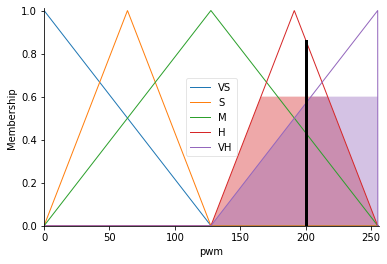

In [33]:
pwm_ctrl=ctrl.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15])
pwm1=ctrl.ControlSystemSimulation(pwm_ctrl)
pwm1.input['setpoint']=18
pwm1.input['sensor']=50
pwm1.compute()
print(pwm1.output['pwm'])
pwm.view(sim=pwm1)